# Monte Carlo Examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Example: Estimate $\pi$
Suppose we want to estimate $\pi$. We can use do this with Monte Carlo.

We know that the area of a circle is $A = \pi r^2$. It can also be written as:
$$A = \int\limits_{-r}^r \int\limits_{-r}^r {\bf 1}(x^2 + y^2 \le r^2)\,{\rm d}x{\rm d}y$$.
We can write this then as
$$A = \int \int f(x, y)~p(x)~p(y)~{\rm d}x{\rm d}y.$$
where $f(x, y) = {\bf 1}(x^2 + y^2 \le r^2)$ and $p(x), p(y)$ are uniform distributions from $-r$ to $r$: $p(x) = p(y) = 1/2r$
This can then be approximated using Monte Carlo integration as
$$A \approx \frac{4r^2}{S} \sum\limits_{i=1}^S f(x_i, y_i)$$

For simplicitiy, if we set $r = 1$

In [2]:
# draw S samples from the distributions p(x) and p(y)
S = 100
x = np.random.uniform(-1., 1., size=S)
y = np.random.uniform(-1., 1., size=S) 

In [3]:
def eff(x, y): 
    # 1(x^2 + y^2 <= 1)
    if x**2 + y**2 <= 1.: return 1.
    else: return 0

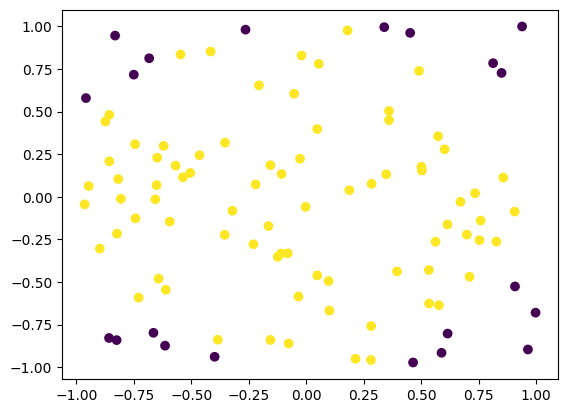

In [4]:
plt.scatter(x, y, c=[eff(x_i, y_i) for x_i, y_i in zip(x, y)])

In [5]:
print(4./ S * np.sum([eff(x_i, y_i) for x_i, y_i in zip(x, y)]))

3.16


Not bad. That was with a sample size of $S=100$. What happens as we increase the sample size? 

In [6]:
def pi_est(S): 
    x = np.random.uniform(-1., 1., size=S)
    y = np.random.uniform(-1., 1., size=S) 
    return 4./ S * np.sum([eff(x_i, y_i) for x_i, y_i in zip(x, y)])

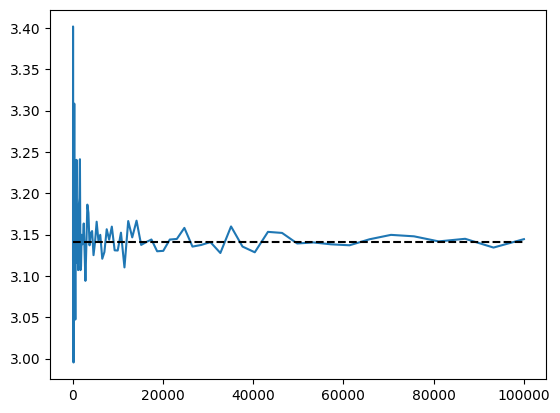

In [7]:
plt.plot(np.logspace(2, 5, 100), [pi_est(_S) for _S in np.logspace(2, 5, 100).astype(int)])
plt.hlines(np.pi, 100, 1e5, color='k', linestyle='--')

Here you can see a nice advantage of Monte Carlo approximation. Its accuracy increases with sample size. 